In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import image
import seaborn as sns
import cv2 as cv
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import functools as f
from sklearn.model_selection import train_test_split
import splitfolders

from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from keras.models import load_model

from tensorflow.keras.preprocessing.image import load_img, img_to_array 

import visualkeras

%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [2]:
import splitfolders
splitfolders.ratio('../Alzheimer_classification/Dataset', output="output", seed=1345, ratio=(.8, 0.1,0.1))

Copying files: 6400 files [00:17, 359.52 files/s]


In [3]:
#Height and width in pixels
img_height = 128
img_width = 128

data_splits = []
direct = ['output/train', 'output/test', 'output/val']
for d in direct: 
    var_name = tf.keras.utils.image_dataset_from_directory(
                    d,
                    label_mode='categorical',
                    labels='inferred',
                    batch_size=64,
                    image_size=(img_height, img_width),
                    seed=123,
                )
    data_splits.append(var_name)
    

Found 5119 files belonging to 4 classes.
Found 961 files belonging to 4 classes.
Found 958 files belonging to 4 classes.


In [4]:
data_splits

[<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>]

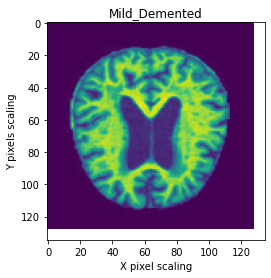

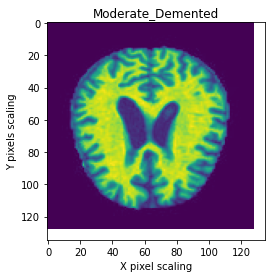

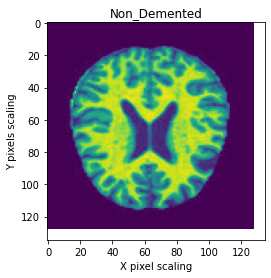

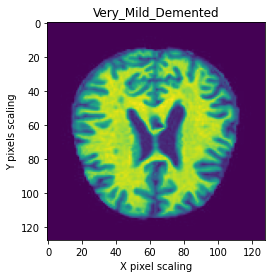

In [5]:
#Visualize images
dem_types = ['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']
examples = ['Mild_Demented/mild_2.jpg', 'Moderate_Demented/moderate_2.jpg', 'Non_Demented/non_2.jpg', 'Very_Mild_Demented/verymild_2.jpg']
for i in range(len(dem_types)): 
    plt.plot(128,128)
    plt.figure(i+1) 
    plt.title(dem_types[i])
    plt.xlabel("X pixel scaling")
    plt.ylabel("Y pixels scaling")
    plt.imshow(image.imread('Dataset/'+ examples[i]))
plt.show()

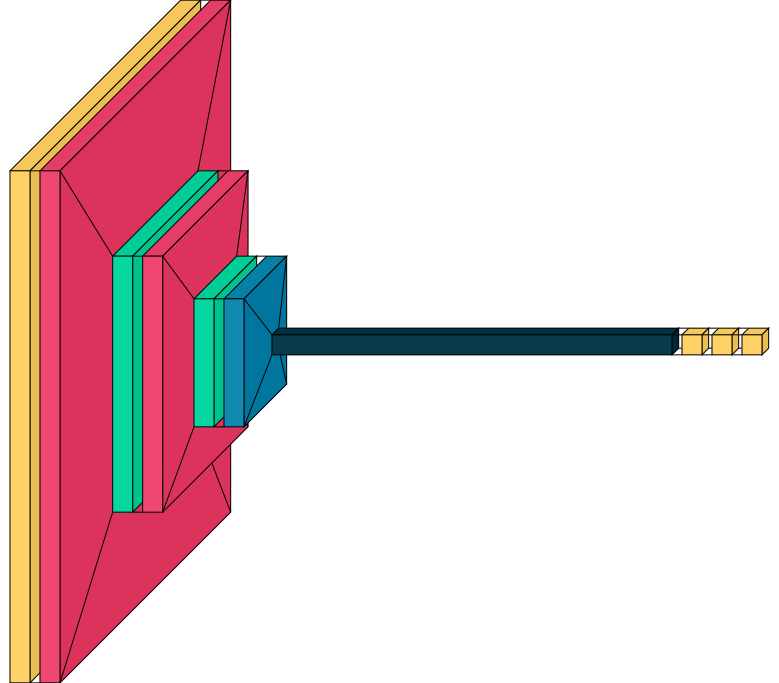

In [6]:
#LeNet-5 CNN Architecture Modified (MaxPool and Dropout 25%)
model = keras.Sequential()
model.add(Rescaling(1./255, input_shape=(128, 128, 3)))
model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation = 'relu', input_shape = (128, 128, 3), kernel_initializer="he_normal"))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation = 'relu', input_shape = (128, 128, 3), kernel_initializer="he_normal"))
model.add(layers.MaxPooling2D())

model.add(Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(units = 128, activation = 'relu', kernel_initializer="he_normal"))
model.add(layers.Dense(units = 64, activation = 'relu'))
model.add(layers.Dense(units = 4, activation = 'softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
visualkeras.layered_view(model)

In [8]:
hist = model.fit(data_splits[0], epochs = 50, validation_data = data_splits[2])

Epoch 1/50
80/80 [==============================] - 47s 572ms/step - loss: 1.1289 - accuracy: 0.5183 - val_loss: 0.8042 - val_accuracy: 0.6242
Epoch 2/50
80/80 [==============================] - 41s 515ms/step - loss: 0.7187 - accuracy: 0.6835 - val_loss: 0.5800 - val_accuracy: 0.7317
Epoch 3/50
80/80 [==============================] - 44s 544ms/step - loss: 0.4175 - accuracy: 0.8482 - val_loss: 0.4106 - val_accuracy: 0.8267
Epoch 4/50
80/80 [==============================] - 44s 543ms/step - loss: 0.2709 - accuracy: 0.9027 - val_loss: 0.1766 - val_accuracy: 0.9457
Epoch 5/50
80/80 [==============================] - 46s 565ms/step - loss: 0.1305 - accuracy: 0.9603 - val_loss: 0.1265 - val_accuracy: 0.9603
Epoch 6/50
80/80 [==============================] - 41s 515ms/step - loss: 0.0880 - accuracy: 0.9744 - val_loss: 0.0774 - val_accuracy: 0.9781
Epoch 7/50
80/80 [==============================] - 41s 514ms/step - loss: 0.0569 - accuracy: 0.9834 - val_loss: 0.0650 - val_accuracy: 0.9760

Accuracy - LeNet5 Architecture Modified


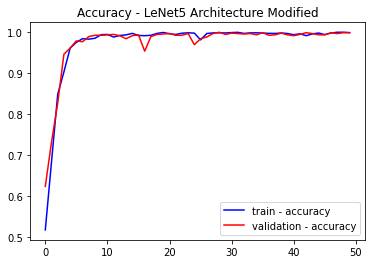




Loss - LeNet5 Architecture Modified


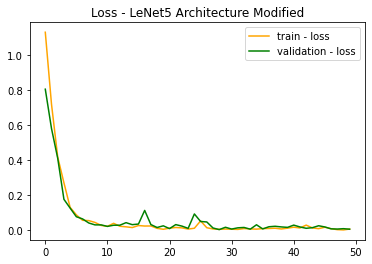

In [13]:
print("Accuracy - LeNet5 Architecture Modified")
plt.plot(hist.history['accuracy'],c='b',label='train - accuracy')
plt.plot(hist.history['val_accuracy'],c='r',label='validation - accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy - LeNet5 Architecture Modified')
plt.show()

print("\n\n")
print('Loss - LeNet5 Architecture Modified')
plt.plot(hist.history['loss'],c='orange',label='train - loss')
plt.plot(hist.history['val_loss'],c='g',label='validation - loss')
plt.legend(loc='upper right')
plt.title('Loss - LeNet5 Architecture Modified')
plt.show()

In [10]:
model.evaluate(data_splits[1])

16/16 [==============================] - 3s 154ms/step - loss: 0.0160 - accuracy: 0.9938


[0.015980279073119164, 0.9937565326690674]

In [11]:
model.save('LeNet-5e50Mod.h5')

In [ ]:
#0.5 accuracy with a LeNet-5 architecture. Better than random guess, but can get something better
#Let's try same architecture but MaxPooling instead of AveragePooling

#LeNet-5 CNN Architecture (with MaxPooling)
model2 = keras.Sequential()
model2.add(Rescaling(1./255, input_shape=(128, 128, 3)))
model2.add(Conv2D(filters=6, kernel_size=(3, 3), padding='same', activation = 'relu', kernel_initializer="he_normal"))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation = 'relu', kernel_initializer="he_normal"))
model2.add(MaxPooling2D(pool_size=(2,2)))


model2.add(Dropout(0.20))

model2.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(units = 128, activation = 'relu', kernel_initializer="he_normal"))
model2.add(Dense(units = 64, activation = 'relu'))
model2.add(Dense(units = 4, activation = 'softmax'))

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
visualkeras.layered_view(model2)

'\n#0.5 accuracy with a LeNet-5 architecture. Better than random guess, but can get something better\n#Let\'s try same architecture but MaxPooling instead of AveragePooling\n\n#LeNet-5 CNN Architecture (with MaxPooling)\nmodel2 = keras.Sequential()\nmodel2.add(Rescaling(1./255, input_shape=(128, 128, 3)))\nmodel2.add(Conv2D(filters=6, kernel_size=(3, 3), padding=\'same\', activation = \'relu\', kernel_initializer="he_normal"))\nmodel2.add(MaxPooling2D(pool_size=(2,2)))\nmodel2.add(Conv2D(filters=16, kernel_size=(3, 3), padding=\'same\', activation = \'relu\', kernel_initializer="he_normal"))\nmodel2.add(MaxPooling2D(pool_size=(2,2)))\n\n\nmodel2.add(Dropout(0.20))\n\nmodel2.add(Conv2D(filters=64,kernel_size=(3,3),padding=\'same\',activation=\'relu\',kernel_initializer="he_normal"))\nmodel2.add(MaxPooling2D(pool_size=(2,2)))\n\nmodel2.add(Dropout(0.25))\nmodel2.add(Flatten())\nmodel2.add(Dense(units = 128, activation = \'relu\', kernel_initializer="he_normal"))\nmodel2.add(Dense(units =

In [ ]:
hist2 = model2.fit(data_splits[0], epochs = 50, validation_data = data_splits[2])

In [ ]:
print("Accuracy - LeNet-5 with MaxPooling")
plt.plot(hist2.history['accuracy'],c='b',label='train - accuracy')
plt.plot(hist2.history['val_accuracy'],c='r',label='validation - accuracy')
plt.legend(loc='lower right')
plt.show()

print("\n\n")
print('Loss - LeNet-5 with MaxPooling')
plt.plot(hist2.history['loss'],c='orange',label='train - loss')
plt.plot(hist2.history['val_loss'],c='g',label='validation - loss')
plt.legend(loc='upper right')
plt.show()

'\nprint("Accuracy - LeNet-5 with MaxPooling")\nplt.plot(hist2.history[\'accuracy\'],c=\'b\',label=\'train - accuracy\')\nplt.plot(hist2.history[\'val_accuracy\'],c=\'r\',label=\'validation - accuracy\')\nplt.legend(loc=\'lower right\')\nplt.show()\n\nprint("\n\n")\nprint(\'Loss - LeNet-5 with MaxPooling\')\nplt.plot(hist2.history[\'loss\'],c=\'orange\',label=\'train - loss\')\nplt.plot(hist2.history[\'val_loss\'],c=\'g\',label=\'validation - loss\')\nplt.legend(loc=\'upper right\')\nplt.show()\n'

In [ ]:
model2.evaluate(data_splits[1])

In [ ]:
model2.save('LeNet-5Maxe50.h5')

In [ ]:

#New Architecture
model3 = Sequential()
model3.add(Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model3.add(Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model3.add(MaxPooling2D(pool_size=(2,2)))


model3.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Dropout(0.20))

model3.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Dropout(0.25))
model3.add(Flatten())
model3.add(Dense(128,activation="relu",kernel_initializer="he_normal"))
model3.add(Dense(64,"relu"))
model3.add(Dense(4,"softmax"))

model3.compile(loss="sparse_categorical_crossentropy", optimizer = "Adam",metrics=["accuracy"])
visualkeras.layered_view(model3)

'\n#New Architecture\nmodel3 = Sequential()\nmodel3.add(Rescaling(1./255, input_shape=(img_height, img_width, 3)))\nmodel3.add(Conv2D(filters=16,kernel_size=(3,3),padding=\'same\',activation=\'relu\',kernel_initializer="he_normal"))\nmodel3.add(MaxPooling2D(pool_size=(2,2)))\n\n\nmodel3.add(Conv2D(filters=32,kernel_size=(3,3),padding=\'same\',activation=\'relu\',kernel_initializer="he_normal"))\nmodel3.add(MaxPooling2D(pool_size=(2,2)))\n\nmodel3.add(Dropout(0.20))\n\nmodel3.add(Conv2D(filters=64,kernel_size=(3,3),padding=\'same\',activation=\'relu\',kernel_initializer="he_normal"))\nmodel3.add(MaxPooling2D(pool_size=(2,2)))\n\nmodel3.add(Dropout(0.25))\nmodel3.add(Flatten())\nmodel3.add(Dense(128,activation="relu",kernel_initializer="he_normal"))\nmodel3.add(Dense(64,"relu"))\nmodel3.add(Dense(4,"softmax"))\n\nmodel3.compile(loss="sparse_categorical_crossentropy", optimizer = "Adam",metrics=["accuracy"])\nvisualkeras.layered_view(model3)\n'

In [ ]:
hist3 = model3.fit(data_splits[0], epochs = 50, validation_data = data_splits[2])

In [ ]:

print("Accuracy - CNN Model")
plt.plot(hist3.history['accuracy'],c='b',label='train - accuracy')
plt.plot(hist3.history['val_accuracy'],c='r',label='validation - accuracy')
plt.legend(loc='lower right')
plt.show()

print("\n\n")
print('Loss - CNN Model')
plt.plot(hist3.history['loss'],c='orange',label='train - loss')
plt.plot(hist3.history['val_loss'],c='g',label='validation - loss')
plt.legend(loc='upper right')
plt.show()


'\nprint("Accuracy - CNN Model")\nplt.plot(hist3.history[\'accuracy\'],c=\'b\',label=\'train - accuracy\')\nplt.plot(hist3.history[\'val_accuracy\'],c=\'r\',label=\'validation - accuracy\')\nplt.legend(loc=\'lower right\')\nplt.show()\n\nprint("\n\n")\nprint(\'Loss - CNN Model\')\nplt.plot(hist3.history[\'loss\'],c=\'orange\',label=\'train - loss\')\nplt.plot(hist3.history[\'val_loss\'],c=\'g\',label=\'validation - loss\')\nplt.legend(loc=\'upper right\')\nplt.show()\n'

In [ ]:
model3.evaluate(data_splits[1])

In [ ]:
model3.save('CNN_Model-e50.h5')

In [ ]:
LeNet5 = load_model('LeNet-5.h5')
img = load_img("output/test/Very_Mild_Demented/verymild_1737.jpg")
img = img.resize((128, 128))
img = img_to_array(img) 

img = img.reshape(-1,128, 128,3)

print(img.shape)

(1, 128, 128, 3)


In [ ]:
print(np.argmax(LeNet5.predict(img)))

1/1 [==============================] - 0s 196ms/step
3


In [4]:
model = load_model('LeNet-5e50Mod.h5')
#preds = np.argmax(model.predict(data_splits[1]))
#testing = np.argmax(data_splits[1])

In [5]:
from sklearn.metrics import classification_report, confusion_matrix

In [31]:
#data_splits[1]

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [28]:
#print(classification_report(y_true=data_splits[1].label_mode,y_pred=preds,target_names = dem_types))
#print(confusion_matrix(testing,preds))
#print(classification_report(testing,preds))

AttributeError: 'BatchDataset' object has no attribute 'label_mode'

In [7]:
preds = np.array([])
labels =  np.array([])
for x, y in data_splits[1]:
  preds = np.concatenate([preds, np.argmax(model.predict(x), axis = -1)])
  labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])
print(classification_report(labels,preds))
print(confusion_matrix(labels,preds))

1/1 [==============================] - 0s 30ms/step
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       135
         1.0       1.00      1.00      1.00        10
         2.0       0.99      1.00      1.00       480
         3.0       1.00      0.99      0.99       336

    accuracy                           0.99       961
   macro avg       0.99      1.00      0.99       961
weighted avg       0.99      0.99      0.99       961

[[135   0   0   0]
 [  0  10   0   0]
 [  0   0 479   1]
 [  2   0   3 331]]
